"Рекламодатель Сигма жалуется на постоянный рост CPA по своим рекламным кампаниям в последние 4 месяца (с июня по сент 2022). 

Ваша задача проанализировать его размещение с целью:
1) Выяснить причину растущего CPA
2) Дать рекомендации по снижению и стабилизации CPA до целевого значения (380 руб)"

Формат:
- Исходный файл в формате Excel с результатами вычисления

- Презентация в формате .ppt c выводами и рекомендациями, подкреплёнными графиками

 
Вкладка data:

Описание столбцов:

Client – название клиента

Device – тип устройства

Category – категория

Place – тип площадки (только для Type: Direct)

BannerType – тип объявления

QueryType – тип запроса (только для Type: Direct , только поиск)

TargetingType – тип таргетинга (только для Type: Direct)

Cost - расходы рекламодателя

Conversions – целевые визиты


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
df = pd.read_excel('tz.xlsx', 'data')
df = df[df['Client']=='Сигма']
df['Cost'] = round(df['Cost'], 2)

In [116]:
def group_n_calc_cpa(df, group_list):
    df_gr = df.groupby(group_list, as_index=False)[['Cost', 'Conversions']].sum()
    df_gr['CPA'] = df_gr['Cost'] / df_gr['Conversions']
    df_gr['CPA'] = df_gr['CPA'].round(2).fillna(0).replace([np.inf], 0)
    return df_gr

def plot_chart(df, title, hue=False, x='Month', y='CPA'):
    plt.figure(figsize=(10, 6))
    if hue:
        sns.lineplot(data=df, x=x, y=y, marker='o', hue=hue)
    else:
        sns.lineplot(data=df, x=x, y=y, marker='o')
    plt.grid(True)
    plt.xticks(ticks=(df['Month']).unique(),
               labels=df['Month'].dt.strftime('%Y-%m').unique(), 
               rotation=45)
    plt.title(title);


Средний CPA за стабильный период 2021-08-2022-03 = 419.52)
Средний CPA за период с низким CPA = 231.445
Снижение на 44%

Средний бюджет за стабильный период 2021-08-2022-03 = 24917060.275)
Средний бюджет за период с низким CPA = 7211075.52
Снижение на 71%


Снижение CPA вероятно связано с резким снижением бюджета. Как правило внчале выкупаются самые релевантные и дешевые конверсии, 
поэтому увеличение бюджета без оптимизации ведет к удоражанию конверсий.
С учетом резкого снижения CPA из за низкого бюджета, можно говорить о том что CPA увеличился только за последние 2 месяца



607.81

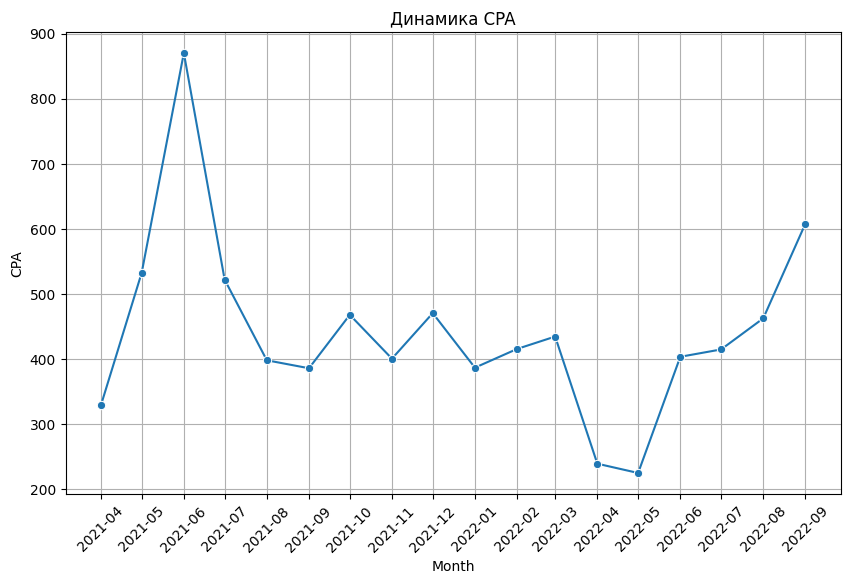

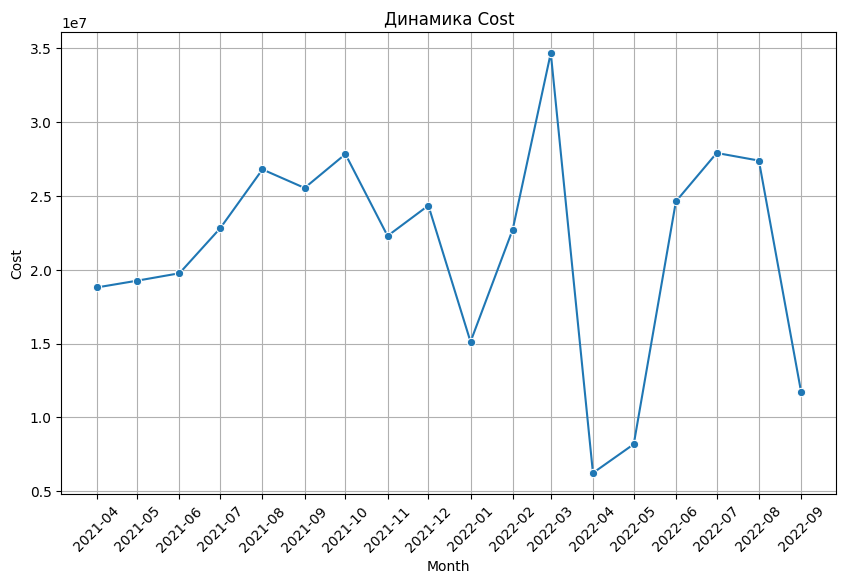

In [146]:

df_month = group_n_calc_cpa(df, ['Month'])
plot_chart(df_month, 'Динамика CPA')
plot_chart(df_month, 'Динамика Cost', y='Cost')
df_month[df_month['Month'] == df_month['Month'].max()]['CPA']

mean_cpa_normal_period = df_month.query('Month>="2021-08" & Month<="2022-03" ')['CPA'].mean()
mean_cpa_decrease_period = df_month.query('Month>="2022-04" & Month<="2022-05" ')['CPA'].mean()
mean_cost_normal_period = df_month.query('Month>="2021-08" & Month<="2022-03" ')['Cost'].mean()
mean_cost_decrease_period = df_month.query('Month>="2022-04" & Month<="2022-05" ')['Cost'].mean()

print(f'''
Средний CPA за стабильный период 2021-08-2022-03 = {mean_cpa_normal_period})
Средний CPA за период с низким CPA = {mean_cpa_decrease_period}
Снижение на {int(((mean_cpa_normal_period-mean_cpa_decrease_period)/mean_cpa_normal_period)*100)}%

Средний бюджет за стабильный период 2021-08-2022-03 = {mean_cost_normal_period})
Средний бюджет за период с низким CPA = {mean_cost_decrease_period}
Снижение на {int(((mean_cost_normal_period-mean_cost_decrease_period)/mean_cost_normal_period)*100)}%


Снижение CPA вероятно связано с резким снижением бюджета. Как правило внчале выкупаются самые релевантные и дешевые конверсии, 
поэтому увеличение бюджета без оптимизации ведет к удоражанию конверсий.
С учетом резкого снижения CPA из за низкого бюджета, можно говорить о том что CPA увеличился только за последние 2 месяца
''')
df_month[df_month['Month'] == df_month['Month'].max()]['CPA'].max()

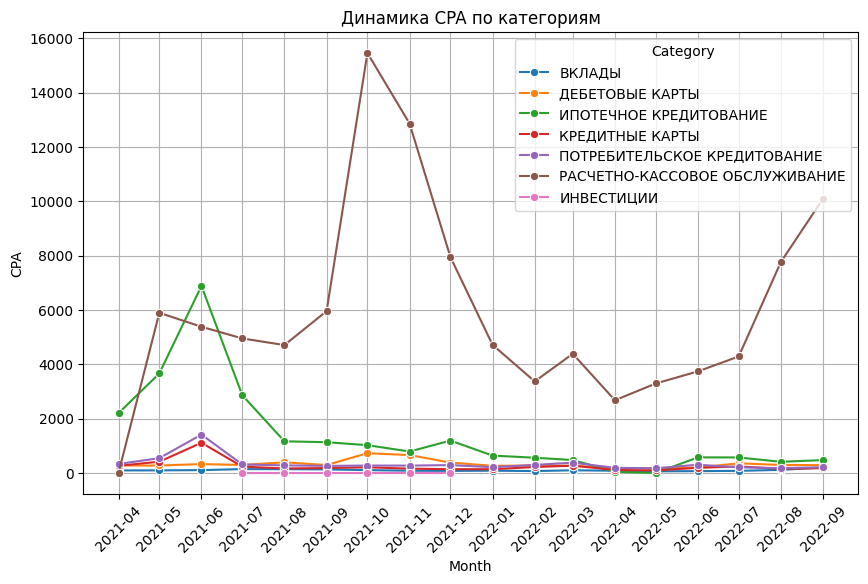

In [4]:
df_category = group_n_calc_cpa(df, ['Month', 'Category'])
plot_chart(df_category, 'Динамика CPA по категориям', hue='Category')

В последние 2 месяца значительный рост CPA по категории РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ

,Category,Cost,Conversions,CPA,Cost_%
0,ВКЛАДЫ,"703,236",5524,127,1.80%
1,ДЕБЕТОВЫЕ КАРТЫ,"1,967,170",6702,294,5.03%
2,ИПОТЕЧНОЕ КРЕДИТОВАНИЕ,"5,300,669",12348,429,13.54%
3,КРЕДИТНЫЕ КАРТЫ,"2,093,802",13154,159,5.35%
4,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,"7,146,546",38256,187,18.26%
5,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,"21,928,597",2621,"8,367",56.03%


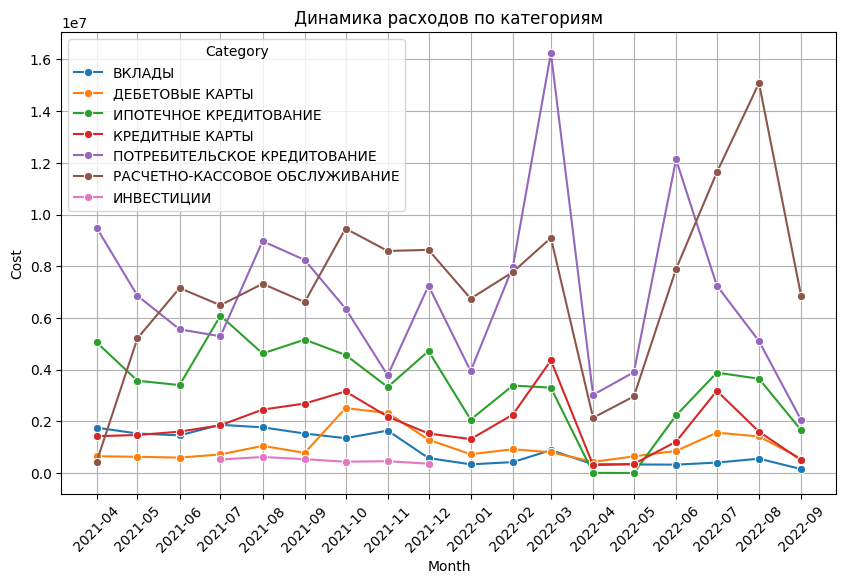

In [154]:
report = group_n_calc_cpa(df, ['Month', 'Category'])
plot_chart(report, 'Динамика расходов по категориям', y='Cost', hue='Category')

report = df.query('Month>="2022-08"').groupby('Category',as_index=False)[['Cost', 'Conversions']].sum()
report['CPA'] = report['Cost'] / report['Conversions']
report['Cost_%'] = report['Cost'] / report['Cost'].sum()
report.style.format({'Cost_%':'{:.2%}', 'Cost':'{:,.0f}', 'CPA':'{:,.0f}'})

При этом на категорию "РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ" расходуется самая большая доля бюджета - 56% за последние 2 месяца

В категории инвестиции, не фиксировались конверсии

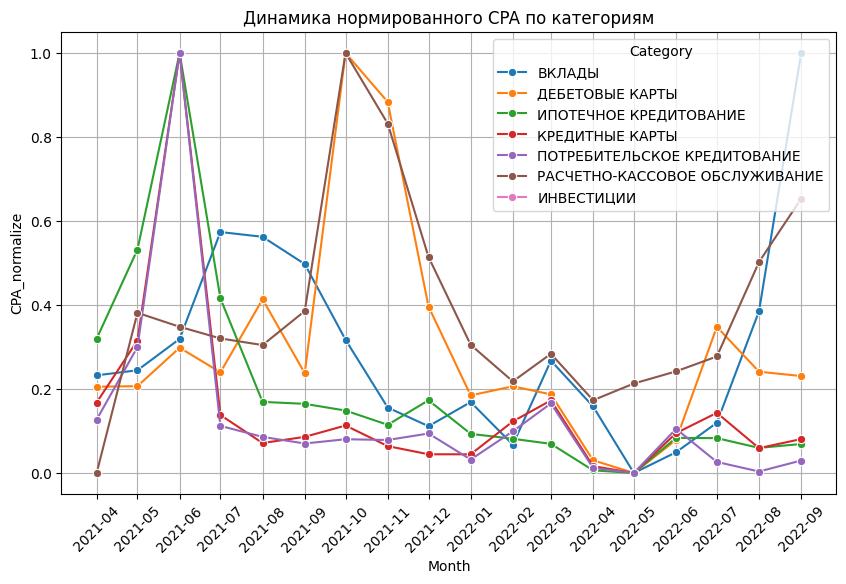

In [195]:
df_category = group_n_calc_cpa(df, ['Month', 'Category'])
df_category['CPA_normalize'] = df_category.groupby('Category')['CPA'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
#df_category_filtr = df_category.query('Category!="РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ"')
plot_chart(df_category, 'Динамика нормированного CPA по категориям', hue='Category', y='CPA_normalize')

Если посмотреть динамику CPA приведенных к одному масштабу, то мы видим что в последние 2 месяца значительно увеличился CPA по вкладам, тем не менее CPA по вкладам остается самым низким 127 руб за последние 2 месяца

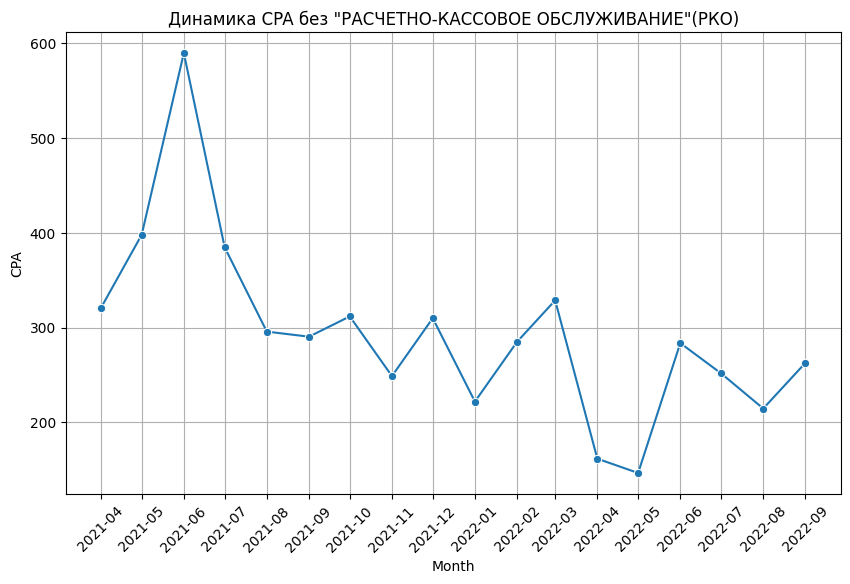

In [43]:
df_filtred = df.query('Category!="РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ"')
report = group_n_calc_cpa(df_filtred, ['Month'])
plot_chart(report, 'Динамика CPA без "РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ"(РКО)', y='CPA')

Если смотреть по всем категориям кроме "РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ", то наблюдается динамика на снижение CPA 

Device,Desktop,Mobile,Total,Mobile_%
Month,,,,
2021-04-01 00:00:00,"299,355","132,738","432,093",30.72%
2021-05-01 00:00:00,"2,922,578","2,288,170","5,210,748",43.91%
2021-06-01 00:00:00,"2,851,047","4,304,664","7,155,710",60.16%
2021-07-01 00:00:00,"4,285,601","2,205,448","6,491,048",33.98%
2021-08-01 00:00:00,"4,713,847","2,604,828","7,318,675",35.59%
2021-09-01 00:00:00,"5,106,300","1,506,632","6,612,932",22.78%
2021-10-01 00:00:00,"6,759,744","2,698,245","9,457,988",28.53%
2021-11-01 00:00:00,"5,239,737","3,349,525","8,589,262",39.00%
2021-12-01 00:00:00,"5,397,254","3,234,651","8,631,904",37.47%


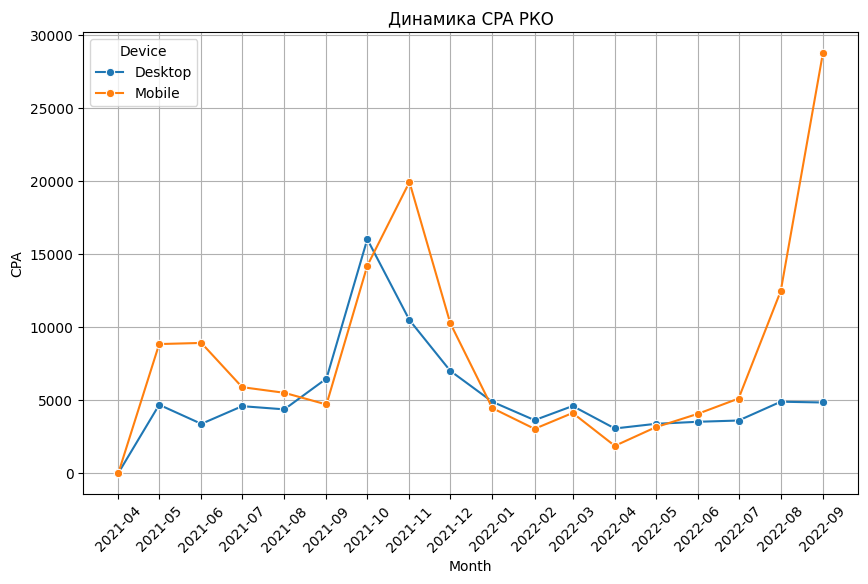

In [197]:
df_rko = df.query('Category=="РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ"')
report = group_n_calc_cpa(df_rko, ['Month', 'Device'])
plot_chart(report, 'Динамика CPA РКО', y='CPA', hue='Device')
#plot_chart(report, 'Динамика Cost РКО', y='Cost', hue='Device')
df_pivot = report.pivot_table(index='Month', columns='Device', values='Cost', aggfunc='sum')
df_pivot['Total'] = (df_pivot['Mobile'] + df_pivot['Desktop'])
df_pivot['Mobile_%'] = df_pivot['Mobile'] / (df_pivot['Mobile'] + df_pivot['Desktop'])
df_pivot.style.format({'Mobile_%':'{:.2%}', 
                     'Desktop':'{:,.0f}', 
                     'Mobile':'{:,.0f}', 
                     'Total':'{:,.0f}'})


За последние 2 месяца в категории РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ CPA значительно вырос на мобильных устройствах - +140%(7 и 8 месяц), +461%(7 и 9 месяцы)

,Month,Place,Cost,Conversions,CPA
0,2021-04-01,Networks,80582.99,0,0.00
1,2021-04-01,Search,351509.88,0,0.00
2,2021-05-01,Networks,1352440.43,140,9660.29
3,2021-05-01,Search,3858308.00,744,5185.90
4,2021-06-01,Networks,3862398.00,295,13092.87
5,2021-06-01,Search,3293312.14,1035,3181.94
6,2021-07-01,Networks,1876767.15,172,10911.44
7,2021-07-01,Search,4614281.17,1139,4051.17
8,2021-08-01,Networks,2149643.81,205,10486.07
9,2021-08-01,Search,5169031.37,1350,3828.91


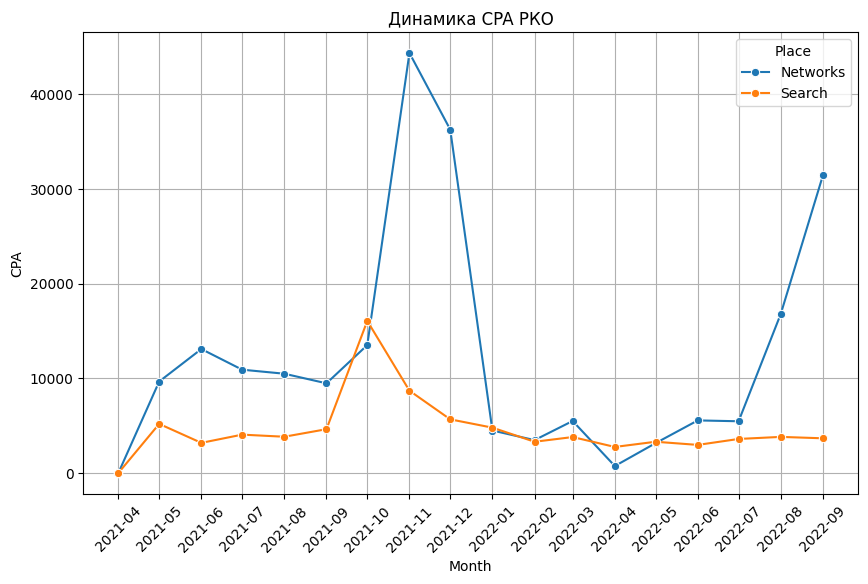

In [188]:
#df_rko_m = df_rko[df_rko['Device']=='Mobile']
report = group_n_calc_cpa(df_rko, ['Month', 'Place'])
plot_chart(report, 'Динамика CPA РКО', y='CPA', hue='Place')
#plot_chart(report, 'Динамика Cost РКО', y='Cost', hue='Place')
report

,Month,Place,Device,Cost,Conversions,CPA,concat
0,2021-04-01,Networks,Desktop,76219.96,0,0.00,Networks - Desktop
1,2021-04-01,Networks,Mobile,4363.03,0,0.00,Networks - Mobile
2,2021-04-01,Search,Desktop,223135.14,0,0.00,Search - Desktop
3,2021-04-01,Search,Mobile,128374.74,0,0.00,Search - Mobile
4,2021-05-01,Networks,Desktop,227245.49,34,6683.69,Networks - Desktop
...,...,...,...,...,...,...,...
67,2022-08-01,Search,Mobile,1751248.26,359,4878.13,Search - Mobile
68,2022-09-01,Networks,Desktop,1291241.27,146,8844.12,Networks - Desktop
69,2022-09-01,Networks,Mobile,3644703.94,11,331336.72,Networks - Mobile
70,2022-09-01,Search,Desktop,1264849.68,383,3302.48,Search - Desktop


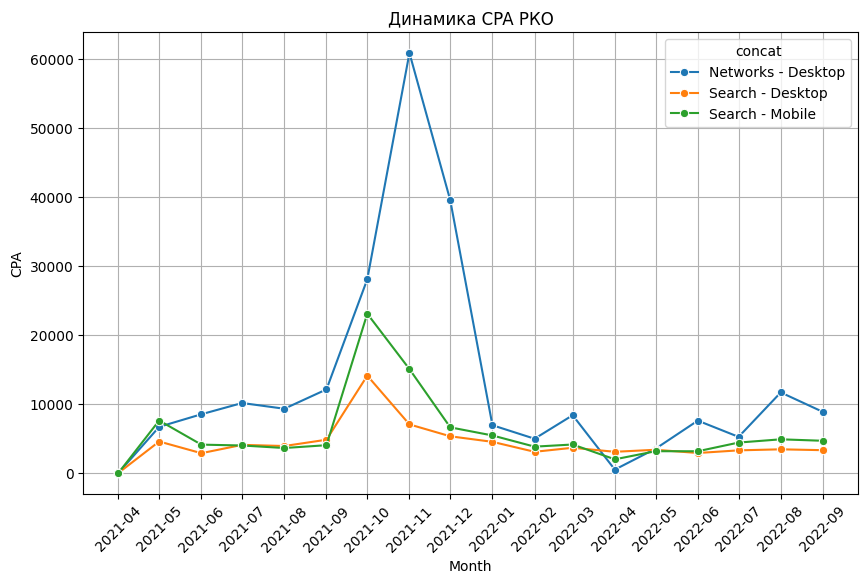

In [194]:
#df_rko_m = df_rko[df_rko['Device']=='Mobile']
report = group_n_calc_cpa(df_rko, ['Month', 'Place', 'Device'])
#plot_chart(report, 'Динамика CPA РКО', y='CPA', hue='Place')
#plot_chart(report, 'Динамика Cost РКО', y='Cost', hue='Place')
report['concat'] = report['Place'] + ' - ' + report['Device']
plot_chart(report.query('concat!="Networks - Mobile"'), 'Динамика CPA РКО', y='CPA', hue='concat')
report

На мобильных устройствах рост CPA в сетях

,Month,BannerType,Cost,Conversions,CPA
0,2021-04-01,image_ad,152.15,0,0.00
1,2021-04-01,text,431940.72,0,0.00
2,2021-05-01,image_ad,545.12,0,0.00
3,2021-05-01,mcbanner,7314.26,0,0.00
4,2021-05-01,text,5202889.05,884,5885.62
5,2021-06-01,cpm_banner,0.00,0,0.00
6,2021-06-01,image_ad,402.64,0,0.00
7,2021-06-01,mcbanner,42526.37,3,14175.46
8,2021-06-01,text,7112781.13,1327,5360.05
9,2021-07-01,cpm_banner,0.00,0,0.00


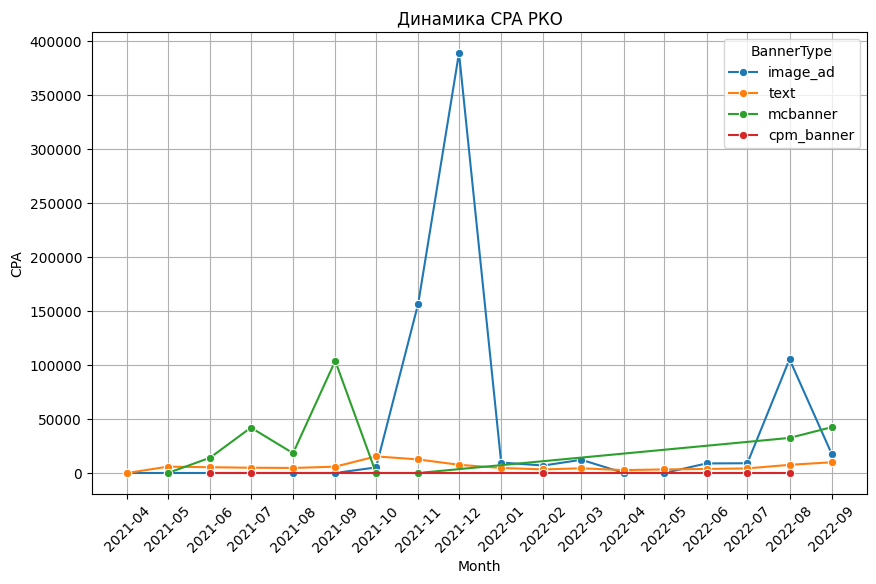

In [179]:
#df_rko_m_p = df_rko_m[df_rko_m['Place']=='Networks']
report = group_n_calc_cpa(df_rko, ['Month', 'BannerType'])
plot_chart(report, 'Динамика CPA РКО', y='CPA', hue='BannerType')
#plot_chart(report, 'Динамика Cost РКО', y='Cost', hue='BannerType')
report

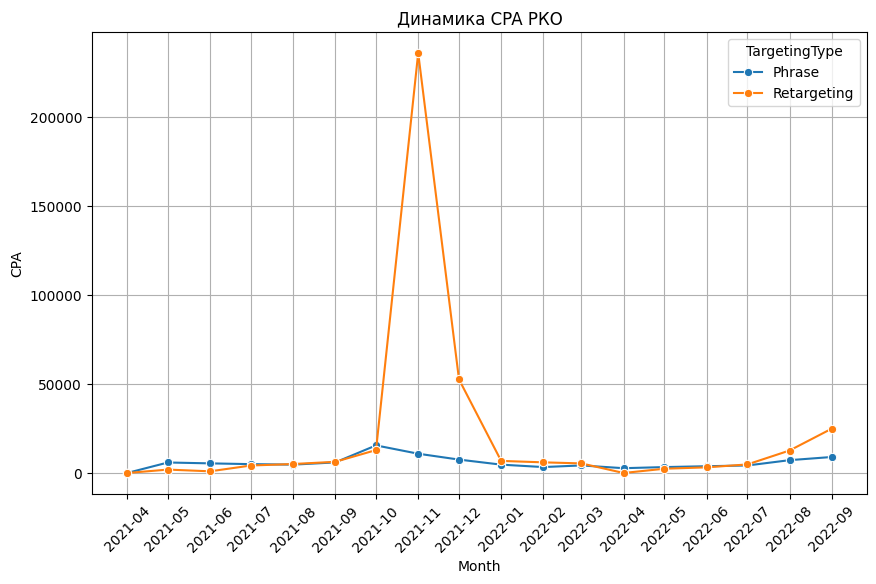

In [175]:

#df_rko_m_p = df_rko_m[df_rko_m['Place']=='Networks']
report = group_n_calc_cpa(df_rko, ['Month', 'TargetingType'])
plot_chart(report, 'Динамика CPA РКО', y='CPA', hue='TargetingType')
#plot_chart(report, 'Динамика Cost РКО', y='Cost', hue='TargetingType')

In [207]:
df_rec = df[~((df['Category']=="РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ") & 
              #(df['Device']=='Mobile') & 
              (df['Place']=='Networks') )]
df_rec_gr = group_n_calc_cpa(df_rec, ['Month'])
df_main = group_n_calc_cpa(df, ['Month'])
df_merge = df_rec_gr.merge(df_main, on='Month', suffixes=('','_main'))
df_merge['conv_diff'] = ((df_merge['Conversions_main'] - df_merge['Conversions']) / df_merge['Conversions_main']) *100
df_merge['cost_diff'] = ((df_merge['Cost_main'] - df_merge['Cost']) / df_merge['Cost_main']) * 100
df_merge

,Month,Cost,Conversions,CPA,Cost_main,Conversions_main,CPA_main,conv_diff,cost_diff
0,2021-04-01,18717769.81,57281,326.77,18798352.80,57281,328.18,0.00,0.43
1,2021-05-01,17909220.60,36054,496.73,19261661.03,36194,532.18,0.39,7.02
2,2021-06-01,15901261.20,22417,709.34,19763659.20,22712,870.19,1.30,19.54
3,2021-07-01,20940306.86,43572,480.59,22817074.01,43744,521.60,0.39,8.23
4,2021-08-01,24645592.83,67186,366.83,26795236.64,67391,397.61,0.30,8.02
5,2021-09-01,22651667.60,65968,343.37,25540498.65,66273,385.38,0.46,11.31
6,2021-10-01,25859779.54,59389,435.43,27832481.34,59535,467.50,0.25,7.09
7,2021-11-01,18831117.23,55636,338.47,22291515.66,55714,400.11,0.14,15.52
8,2021-12-01,21411998.14,51714,414.05,24350088.47,51795,470.12,0.16,12.07
9,2022-01-01,13566136.11,38804,349.61,15122521.45,39151,386.26,0.89,10.29
